In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
#loading the training data
X_train=pd.read_csv('datasets/training_set_features.csv')
y_train=pd.read_csv('datasets/training_set_labels.csv')
#df is the train_data
h=y_train.drop(columns=['respondent_id'])
df=pd.concat([X_train,h],axis=1)
df.head(5)

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [3]:
df.isnull().any()

respondent_id                  False
xyz_concern                     True
xyz_knowledge                   True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_xyz                 True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_xyz_vacc_effective      True
opinion_xyz_risk                True
opinion_xyz_sick_from_vacc      True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                       True
race                           False
sex                            False
income_poverty                  True
m

In [4]:
df.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [5]:
#loading the test data
X_test=d=pd.read_csv('datasets/test_set_features.csv')

In [6]:
d.isnull().any()

respondent_id                  False
xyz_concern                     True
xyz_knowledge                   True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_xyz                 True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_xyz_vacc_effective      True
opinion_xyz_risk                True
opinion_xyz_sick_from_vacc      True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                       True
race                           False
sex                            False
income_poverty                  True
m

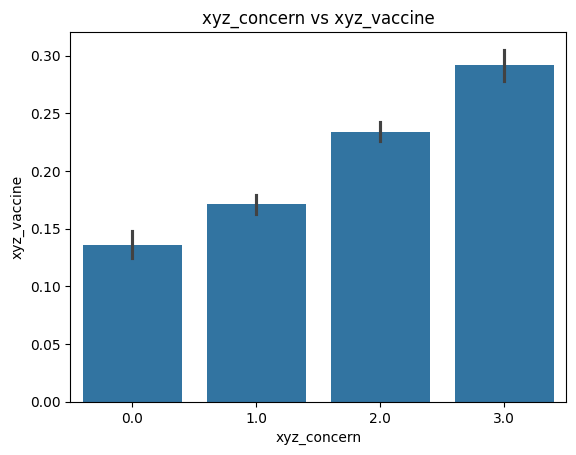

In [7]:
#now lets become one with our data
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot to show the relationship between 'xyz_concern' and 'xyz_vaccine'
sns.barplot(x='xyz_concern', y='xyz_vaccine', data=df)
plt.title('xyz_concern vs xyz_vaccine')
plt.show()

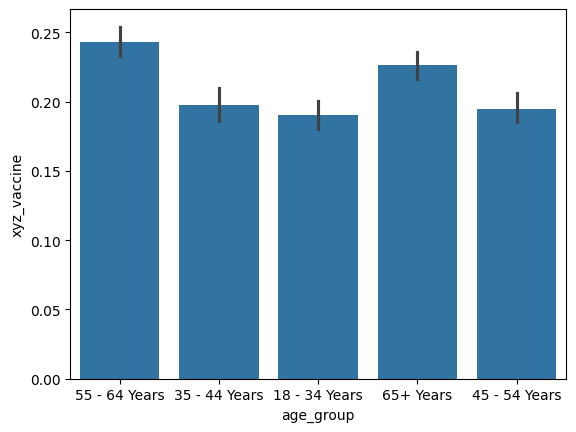

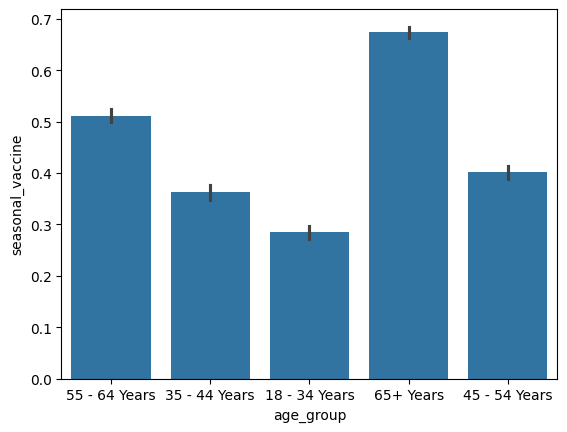

In [8]:
# Bar plot to show the relationship between 
sns.barplot(x='age_group', y='xyz_vaccine', data=df)
plt.show()

# Bar plot to show the relationship between 
sns.barplot(x='age_group', y='seasonal_vaccine', data=df)
plt.show()

#older age groups are more likely to get vaccinated

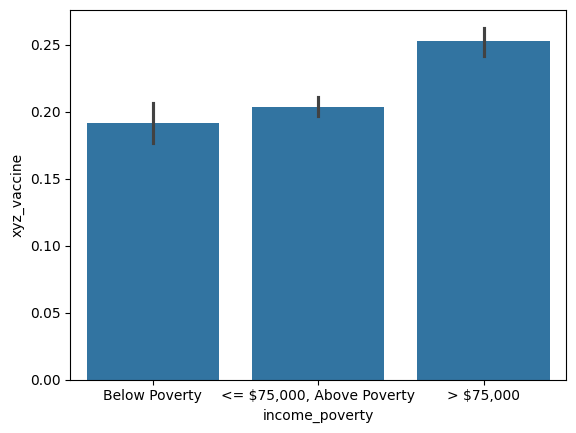

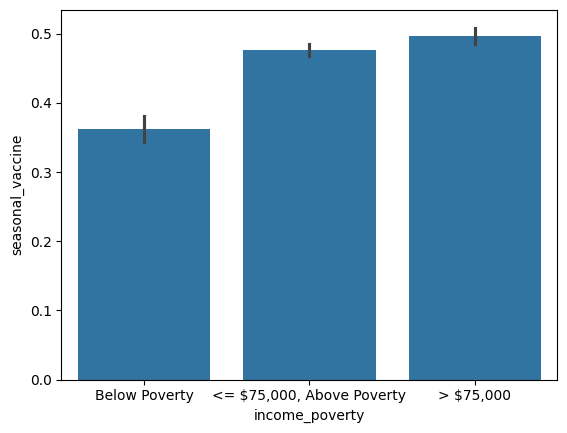

In [9]:
# Bar plot to show the relationship between 
sns.barplot(x='income_poverty', y='xyz_vaccine', data=df)
plt.show()


# Bar plot to show the relationship between 
sns.barplot(x='income_poverty', y='seasonal_vaccine', data=df)
plt.show()
#below poverty are less likely to get vaccinated

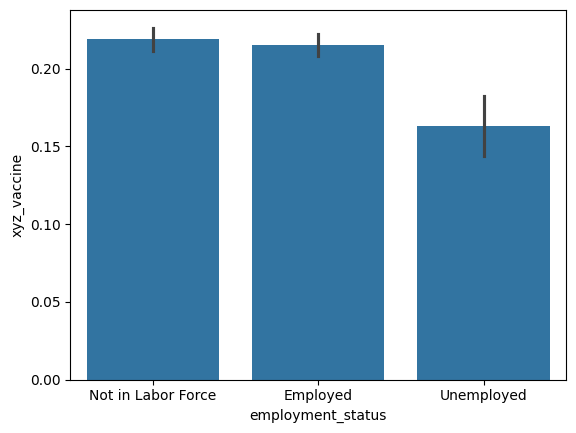

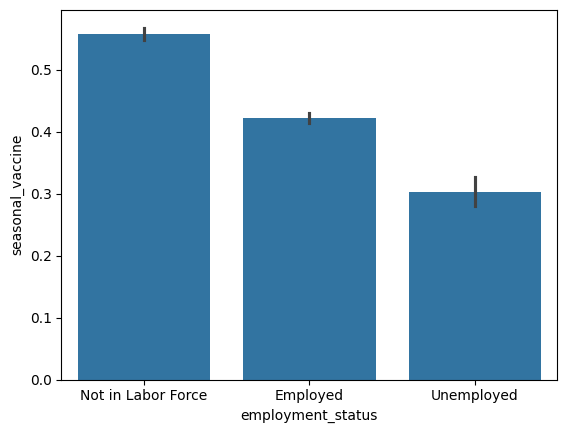

In [10]:
# Bar plot to show the relationship between 
sns.barplot(x='employment_status', y='xyz_vaccine', data=df)
plt.show()

# Bar plot to show the relationship between 
sns.barplot(x='employment_status', y='seasonal_vaccine', data=df)
plt.show()
#unempolyed are less likely to get vaccinated

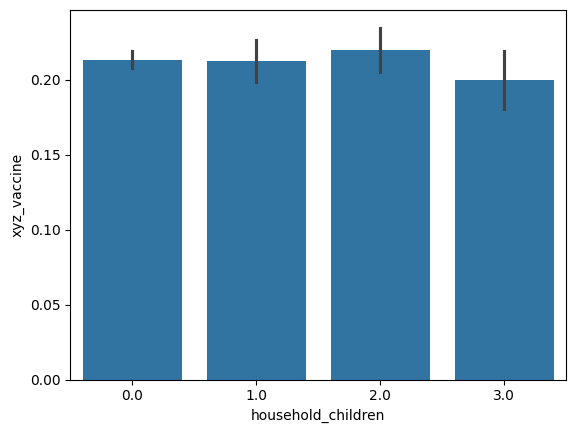

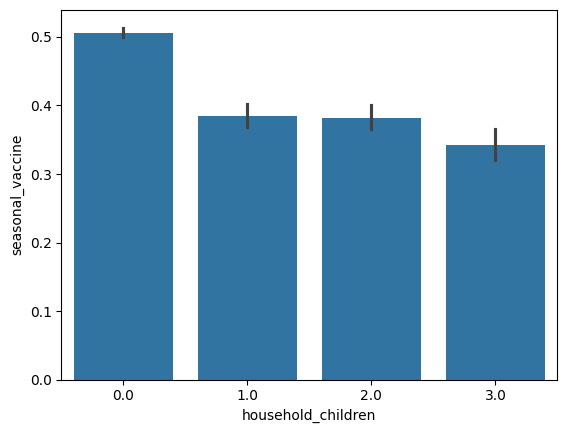

In [11]:
# Bar plot to show the relationship between 
sns.barplot(x='household_children', y='xyz_vaccine', data=df)
plt.show()

# Bar plot to show the relationship between 
sns.barplot(x='household_children', y='seasonal_vaccine', data=df)
plt.show()
#unempolyed are less likely to get vaccinated

In [12]:
columns_with_missing = [
    'xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
    'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
    'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_xyz',
    'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
    'health_worker', 'health_insurance', 'opinion_xyz_vacc_effective',
    'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
    'opinion_seas_risk', 'opinion_seas_sick_from_vacc','education','income_poverty','marital_status','rent_or_own','employment_status',
    'household_adults','household_children','employment_industry',
    'employment_occupation'
]
for col in columns_with_missing:
    if df[col].dtype in ['float64', 'int64']:  # For numerical columns
        df[col].fillna(df[col].median(), inplace=True)
        d[col].fillna(d[col].median(), inplace=True)
    else:  # For categorical columns
        df[col].fillna(method='ffill')
        d[col].fillna(method='ffill')

In [13]:
columns_with_missing = [
    'age_group','education','income_poverty','marital_status','rent_or_own','employment_status',
    'household_adults','household_children','employment_industry',
    'employment_occupation'
]
for col in columns_with_missing:
    if d[col].dtype in ['float64', 'int64']:  # For numerical columns
        d[col].fillna(d[col].median(), inplace=True)
    else:  # For categorical columns
        d[col].fillna(method='ffill', inplace=True)

In [14]:
d.isnull().any()

respondent_id                  False
xyz_concern                    False
xyz_knowledge                  False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_xyz                False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_worker                  False
health_insurance               False
opinion_xyz_vacc_effective     False
opinion_xyz_risk               False
opinion_xyz_sick_from_vacc     False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
age_group                      False
education                      False
race                           False
sex                            False
income_poverty                 False
m

In [15]:
label_encoder = LabelEncoder()
df['education'] = label_encoder.fit_transform(df['education'].astype(str))
d['education']= label_encoder.fit_transform(d['education'].astype(str))
print(d['education'])

0        2
1        0
2        2
3        0
4        0
        ..
26703    1
26704    0
26705    3
26706    3
26707    2
Name: education, Length: 26708, dtype: int32


In [16]:
df['age_group'] = label_encoder.fit_transform(df['age_group'].astype(str))
d['age_group']= label_encoder.fit_transform(d['age_group'].astype(str))
print(df['age_group'])

0        3
1        1
2        0
3        4
4        2
        ..
26702    4
26703    0
26704    3
26705    0
26706    4
Name: age_group, Length: 26707, dtype: int32


In [17]:

columns_to_drop = ['hhs_geo_region','employment_industry', 'employment_occupation']
df=df.drop(columns=columns_to_drop)
d=d.drop(columns=columns_to_drop)

In [18]:
columns_to_encode=['race', 'sex', 'marital_status', 'census_msa', 'rent_or_own','income_poverty', 'employment_status']
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col].astype(str))
    d[col] = label_encoder.fit_transform(d[col].astype(str))


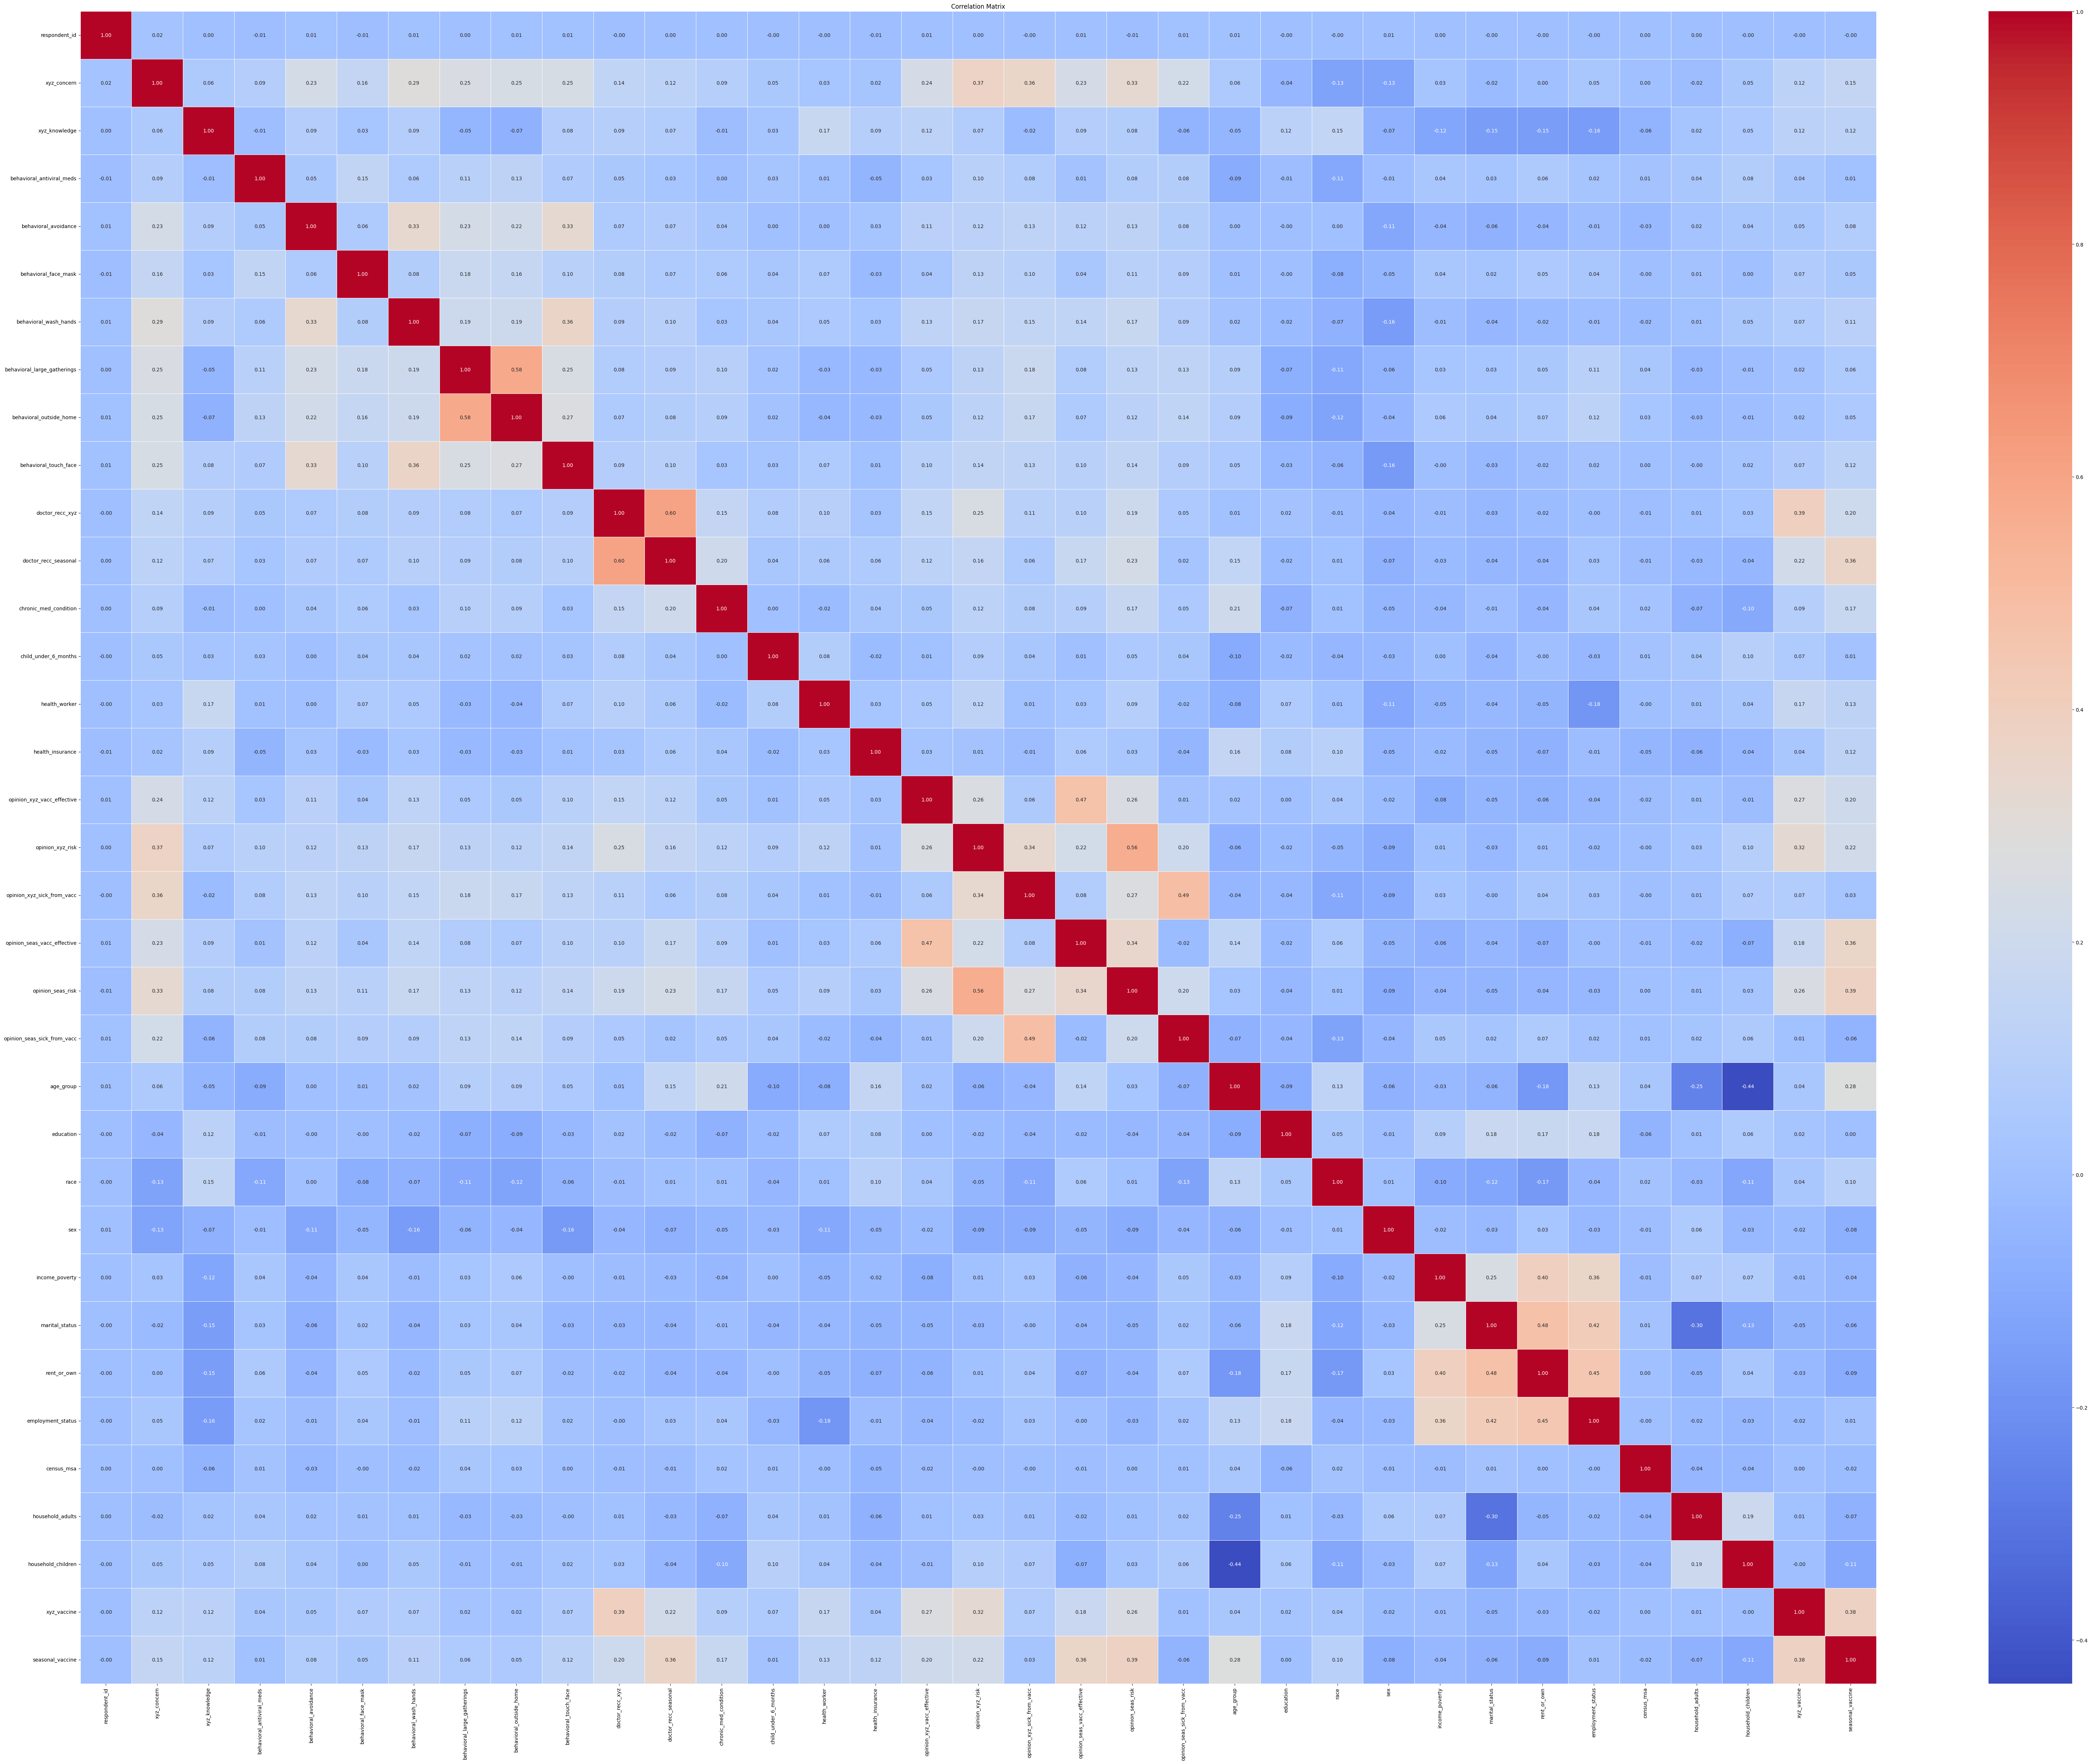

In [19]:
#observing correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(80, 60))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
#checked for multicollinearity

In [21]:
X_train=df.drop(columns=['xyz_vaccine','seasonal_vaccine'])

In [22]:
X_train

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,3,0,2,1,0,1,2,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,3,1,2,1,1,0,0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,3,1,0,1,0,0,0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,3,0,2,1,1,1,1,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,3,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,3,0,0,1,0,1,2,0.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2,3,1,0,1,1,0,1,1.0,0.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,3,3,0,3,1,0,3,0,0.0,0.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3,1,0,0,0,1,0,2,1.0,0.0


In [23]:
#now make train and validation set
y_train_=df.xyz_vaccine
y_train_1=df.seasonal_vaccine
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train_, test_size=0.2, random_state=42)
X_train1=scaler.fit_transform(X_train1)
X_val=scaler.transform(X_val)
X_train2, X_val1, y_train2, y_val1 = train_test_split(X_train, y_train_1, test_size=0.2, random_state=42)
X_train2=scaler.fit_transform(X_train2)
X_val1=scaler.transform(X_val1)

#let us now test our models for best results
model1=LinearRegression()
model2=LogisticRegression(random_state=50, solver='lbfgs', max_iter=1000)
model3=SVC(C=5)
model4=MultinomialNB()
model5=GaussianNB()
model6=RandomForestClassifier(n_estimators=100, min_samples_split=2,)

In [24]:
#fitting in data
model1.fit(X_train1,y_train1)
y_pred=model1.predict(X_val)
roc_auc1 = roc_auc_score(y_val, y_pred,average='macro')
print(f'ROC AUC Score1: {roc_auc1}')

#now we can test this model on test set
X_train= scaler.fit_transform(X_train)
d1=scaler.transform(d)
model1.fit(X_train,y_train_)
y_pred1=model1.predict(d1)


ROC AUC Score1: 0.8265484624629167


In [25]:
model1.fit(X_train2,y_train2)
y_pred=model1.predict(X_val1)
roc_auc2 = roc_auc_score(y_val1, y_pred,average='macro')
print(f'ROC AUC Score2: {roc_auc2}')
#predicting for seasonal_vaccine
model1.fit(X_train,y_train_1)
y_pred2=model1.predict(d1)

ROC AUC Score2: 0.8495069251483346


In [26]:
roc_auc=(roc_auc1+roc_auc2)/2
roc_auc #avg of both roc_auc

0.8380276938056257

In [27]:
#output dataframe
y_pred1=pd.DataFrame(y_pred1)
y_pred2=pd.DataFrame(y_pred2)
j=pd.concat([d.respondent_id,y_pred1,y_pred2],axis=1)

In [28]:
j

,respondent_id,0,0
0,26707,0.060965,0.257784
1,26708,0.021400,-0.049475
2,26709,0.377005,0.616777
3,26710,0.489455,0.838375
4,26711,0.240174,0.465955
...,...,...,...
26703,53410,0.394905,0.469437
26704,53411,0.110812,0.269760
26705,53412,0.197415,0.289824
26706,53413,0.081035,0.434298


In [29]:
#output.csv 
j.columns = ['respondent_id','h1n1_vaccine', 'seasonal_vaccine']
file_path = 'C:/Users/USER/Documents/output.csv'
j.to_csv(file_path, index=False)